(1024, 1024)
[[-0.4375 -1.      0.     ...  0.      0.      0.    ]
 [-0.4375 -1.      0.     ...  0.25    0.25    0.25  ]
 [-0.4375 -1.      0.     ...  0.5     0.5     0.5   ]
 ...
 [ 0.1875 -0.3125 -0.0625 ... -0.5625 -0.5    -0.5   ]
 [-0.5625 -0.3125  0.125  ...  0.125  -0.4375 -0.4375]
 [-0.0625  0.375  -1.0625 ...  0.      1.3125  1.3125]]
False
image_h:-5.3125 151.8125, image_m:-877.0 1042.1000000000001
image_h_1:-5.4375 91.9375, image_m_1:-800.6 935.4000000000001
0.0 0.0 0.0 0.0


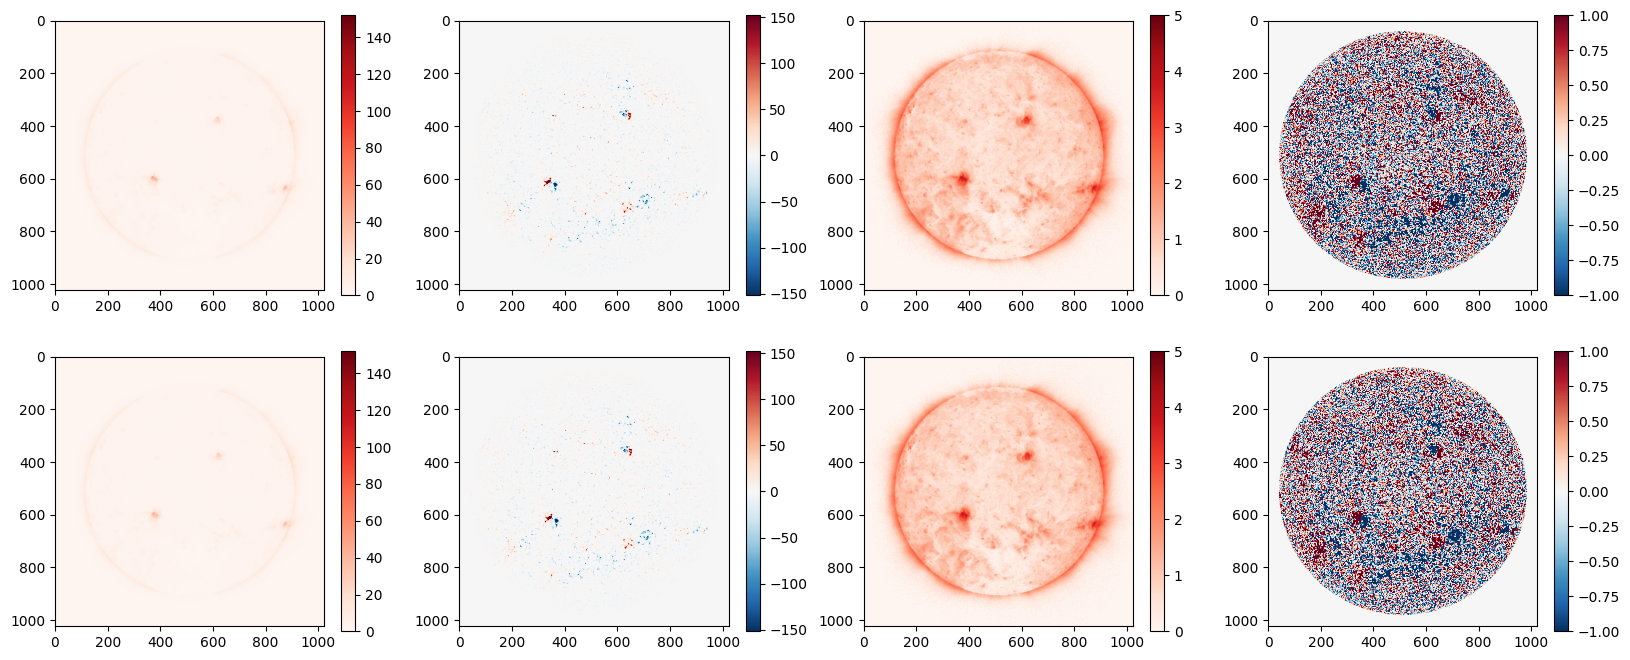

In [55]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt

H="/mnt/nas/home/zhouyuqing/downloads/AIA20100531_0000_0094.fits"
mag='/mnt/nas/home/huxing/202407/nas/data/hmi/fits/2010/05/31/hmi.M_720s.20100531_000000_TAI.fits'
H_1="/mnt/nas/home/zhouyuqing/downloads/AIA20100531_0100_0094.fits"
mag_1='/mnt/nas/home/huxing/202407/nas/data/hmi/fits/2010/05/31/hmi.M_720s.20100531_010000_TAI.fits'
image_h = fits.open(H)[1].data
image_m = np.nan_to_num(fits.open(mag)[1].data, nan=0)

image_h_1 = fits.open(H_1)[1].data
image_m_1 = np.nan_to_num(fits.open(mag_1)[1].data,nan=0)
def abs_log(image):
    image = np.sign(image)*np.log(np.abs(image)+1)
    return image

print(image.shape)
print(image)
print(np.isnan(image).any())
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
plt.imshow(image,cmap='Blues')
vmax_h = np.max((np.max(image_h),np.max(image_h_1)))
vmin_h = 0
vmax_m = np.max((np.max(image_m),np.max(image_m_1)))
vmin_m = np.min((np.min(image_m),np.min(image_m_1)))
vmax_m = np.max(np.abs(vmax_h),np.abs(vmin_h))
vmin_m = -np.min(np.abs(vmax_h),np.abs(vmin_h))
print(f"image_h:{np.min(image_h)} {np.max(image_h)}, image_m:{np.min(image_m)} {np.max(image_m)}")
print(f"image_h_1:{np.min(image_h_1)} {np.max(image_h_1)}, image_m_1:{np.min(image_m_1)} {np.max(image_m_1)}")
print(image_m[0,0],image_m[0,-1],image_m[-1,0],image_m[-1,-1])
cax = axs[0][0].imshow(image_h,cmap='Reds',vmax=vmax_h,vmin=vmin_h)
cbar = fig.colorbar(cax, ax=axs[0][0])
cax = axs[0][1].imshow(image_m,cmap='RdBu_r',vmax=vmax_m,vmin=vmin_m)
cbar = fig.colorbar(cax, ax=axs[0][1])
cax = axs[0][2].imshow(abs_log(image_h),cmap='Reds', vmin=0, vmax=5)
cbar = fig.colorbar(cax, ax=axs[0][2])
cax = axs[0][3].imshow(abs_log(image_m),cmap='RdBu_r',  vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=axs[0][3])
cax = axs[1][0].imshow(image_h_1,cmap='Reds',vmax=vmax_h,vmin=vmin_h)
cbar = fig.colorbar(cax, ax=axs[1][0])
cax = axs[1][1].imshow(image_m_1,cmap='RdBu_r', vmax=vmax_m,vmin=vmin_m)
cbar = fig.colorbar(cax, ax=axs[1][1])
cax = axs[1][2].imshow(abs_log(image_h_1),cmap='Reds',vmin=0,vmax=5)
cbar = fig.colorbar(cax, ax=axs[1][2])
cax = axs[1][3].imshow(abs_log(image_m_1),cmap='RdBu_r',vmin=-1,vmax=1)
cbar = fig.colorbar(cax, ax=axs[1][3])


# plt.colorbar()
# plt.title('AIA 20130404 0094')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.show()